<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0629_35%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5B%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1_2%EA%B3%BC(LSTM_)%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

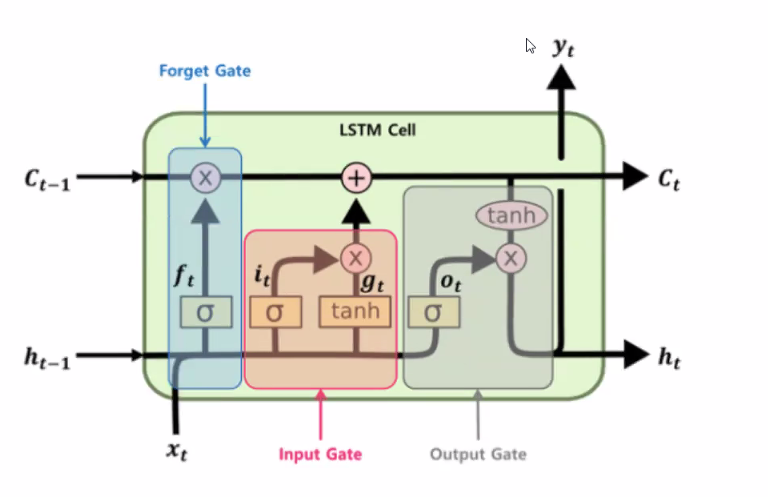

$$
y_t = h_t\\
h_t = o_t * tanh(c_t)\\
o_t = i(W_o * [h_{t-1}, x_t]+b_0)\\
c_t = c_t-1 x f_t x i_t x g_t\\
f_t = o(W_f * [h_{t-1}, x_t] + b_f)\\
i_t = o(W_i * [h_{t-1}, x_t] + b_i)\\
g_t = tanh(W_g * [h_{t-1}, x_t] + b_g)
$$
\
$$
W * [h_{t-1}, x_t] = x_t * W + h_t-1 * W\\
y = X * W + B\\
y = np.dot(X,W) + B
$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('OBS_ASOS_ANL_20220625151356.csv',skiprows=[0], names=['site','loca','year','airtemp','hpa','rain','hm','rn','ws','evapor'], encoding='cp949')

In [ ]:
df.head()

,site,loca,year,airtemp,hpa,rain,hm,rn,ws,evapor
0,108,서울,1907,NaN,NaN,126.6,NaN,NaN,NaN,201.1
1,108,서울,1908,10.4,NaN,1066.3,70.9,NaN,3.2,1386.6
2,108,서울,1909,10.6,NaN,827.0,69.3,NaN,3.3,1405.8
3,108,서울,1910,10.3,NaN,1020.9,69.9,NaN,3.0,1380.3
4,108,서울,1911,10.6,NaN,1067.0,72.0,NaN,3.1,1242.9


In [ ]:
df = df[['airtemp','rain','hm','evapor']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,airtemp,rain,hm,evapor
1,10.4,1066.3,70.9,1386.6
2,10.6,827.0,69.3,1405.8
3,10.3,1020.9,69.9,1380.3
4,10.6,1067.0,72.0,1242.9
5,10.1,1129.3,69.4,1204.1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
signal_data = scaler.fit_transform(df)

In [ ]:
def seq2dataset(seq, window, horizon):
    X=[]
    Y=[]
    for i in range(len(seq)-(window + horizon)+1):
        #print(i)    #0~102
        #print(window)   #3
        idx = i+window
        #print(idx) #3~105
        x=seq[i:idx]
        #print('x :', x.shape)
        y=seq[idx+horizon-1]
        #print('y:' ,y.shape)
        #y = (seq[idx+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [ ]:
X, Y = seq2dataset(signal_data, 3,1)

In [ ]:
x_train =X[:82]
y_train =Y[:82]
x_test = X[82:]
y_test = Y[82:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=128, activation = 'relu',input_shape= x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

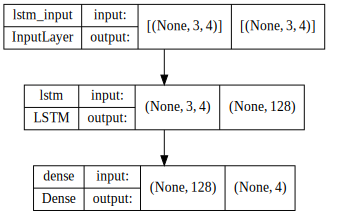

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi = 70).create(prog='dot',format='svg'))

In [ ]:
hist = model.fit(x_train, y_train, epochs= 200, batch_size = 1, validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
82/82 - 2s - loss: 0.2342 - accuracy: 0.5732 - val_loss: 0.3270 - val_accuracy: 0.0000e+00 - 2s/epoch - 27ms/step
Epoch 2/200
82/82 - 0s - loss: 0.1418 - accuracy: 0.7683 - val_loss: 0.2895 - val_accuracy: 0.0000e+00 - 219ms/epoch - 3ms/step
Epoch 3/200
82/82 - 0s - loss: 0.1366 - accuracy: 0.7683 - val_loss: 0.2178 - val_accuracy: 0.5714 - 236ms/epoch - 3ms/step
Epoch 4/200
82/82 - 0s - loss: 0.1362 - accuracy: 0.7683 - val_loss: 0.2378 - val_accuracy: 0.1429 - 264ms/epoch - 3ms/step
Epoch 5/200
82/82 - 0s - loss: 0.1330 - accuracy: 0.8049 - val_loss: 0.2256 - val_accuracy: 0.5238 - 263ms/epoch - 3ms/step
Epoch 6/200
82/82 - 0s - loss: 0.1299 - accuracy: 0.8293 - val_loss: 0.1906 - val_accuracy: 0.6190 - 226ms/epoch - 3ms/step
Epoch 7/200
82/82 - 0s - loss: 0.1262 - accuracy: 0.8415 - val_loss: 0.1793 - val_accuracy: 0.6190 - 263ms/epoch - 3ms/step
Epoch 8/200
82/82 - 0s - loss: 0.1281 - accuracy: 0.8171 - val_loss: 0.1880 - val_accuracy: 0.6190 - 216ms/epoch - 3ms/step
Ep

In [ ]:
ev = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print(ev)

[0.2680565118789673, 0.4285714328289032]


# 예측값보는법

In [ ]:
def single_history_plot(train, val=None):
    plt.plot(train)
    plt.plot(val)
    plt.title('Train & Validation')
    plt.ylabel('values')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.grid()
    plt.show()

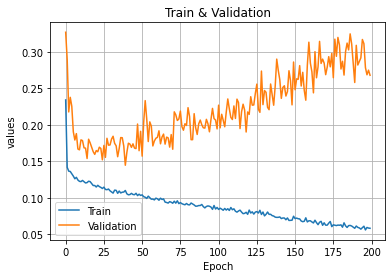

In [ ]:
single_history_plot(hist.history['loss'], hist.history['val_loss'])

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([[0.742373  , 1.0672975 , 0.63600063, 0.19081888],
       [0.98185456, 0.7575192 , 0.46182537, 0.35561427],
       [0.8349035 , 0.42671365, 0.5587848 , 0.3269893 ],
       [0.7604182 , 0.62623763, 0.55709803, 0.3305365 ],
       [0.9014696 , 0.47700953, 0.33224317, 0.40534568],
       [0.72332144, 1.0997386 , 0.68942857, 0.12341424],
       [0.94849133, 0.6193203 , 0.4421051 , 0.3517531 ],
       [0.93155444, 0.8724692 , 0.45835617, 0.3065853 ],
       [1.018194  , 1.0430089 , 0.39122334, 0.25399518],
       [0.8989595 , 0.38945293, 0.46256924, 0.38818717],
       [0.70479524, 0.70497036, 0.7012001 , 0.26572862],
       [0.89185035, 0.6599128 , 0.4222989 , 0.43735638],
       [1.0446422 , 1.0936884 , 0.5072976 , 0.4722174 ],
       [1.0535537 , 0.9625511 , 0.5112743 , 0.51164967],
       [0.687446  , 0.46514922, 0.62036794, 0.378741  ],
       [1.0137553 , 0.6409261 , 0.27250046, 0.3483257 ],
       [0.9454752 , 0.3121627 , 0.23628831, 0.2656308 ],
       [1.0324085 , 0.7933402 ,

In [ ]:
def predict_range_plot(y, pred, x_range):
    plt.plot(x_range, y[x_range], 'r')
    plt.plot(x_range, pred[x_range], 'b')
    plt.legend(['True','Predicted'], loc = 'best')
    plt.grid()
    plt.show()

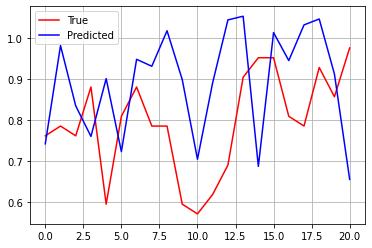

In [ ]:
predict_range_plot(y_test[:,0],pred[:, 0], range(21))

In [ ]:
y_test[:,0]

array([0.76190476, 0.78571429, 0.76190476, 0.88095238, 0.5952381 ,
       0.80952381, 0.88095238, 0.78571429, 0.78571429, 0.5952381 ,
       0.57142857, 0.61904762, 0.69047619, 0.9047619 , 0.95238095,
       0.95238095, 0.80952381, 0.78571429, 0.92857143, 0.85714286,
       0.97619048])

In [ ]:
pred.shape

(21, 4)

In [ ]:
x_test.shape

(21, 3, 4)

In [ ]:
x_test[20:]

array([[[0.78571429, 0.38140878, 0.05294118, 0.91451876],
        [0.92857143, 0.15461894, 0.01176471, 1.        ],
        [0.85714286, 0.59330254, 0.4       , 0.89412724]]])

In [ ]:
x_test_hat = model.predict(x_test[20:])

In [ ]:
x_test_hat

array([[0.6557001, 0.5350096, 0.850038 , 0.3800537]], dtype=float32)

# 복원시키자

In [ ]:
scaler.inverse_transform(x_test_hat)

array([[  12.35394 , 1550.1367  ,   71.050644, 1113.4729  ]],
      dtype=float32)

In [ ]:
df.tail()

,airtemp,rain,hm,evapor
110,13.0,1233.2,57.8,1426.4
111,12.9,1284.1,57.5,1441.1
112,13.5,891.3,56.8,1493.5
113,13.2,1651.1,63.4,1428.6
114,13.7,1186.5,65.7,1415.1


In [ ]:
scaler.inverse_transform(x_test[20])

array([[  12.9, 1284.1,   57.5, 1441.1],
       [  13.5,  891.3,   56.8, 1493.5],
       [  13.2, 1651.1,   63.4, 1428.6]])

# 과제

In [ ]:
x_hat = x_test[0]

In [ ]:
x_hat

array([[1.        , 0.99630485, 0.48823529, 0.33181077],
       [0.85714286, 0.64064665, 0.51176471, 0.46606852],
       [0.73809524, 0.32523095, 0.42352941, 0.35840131]])

In [ ]:
x_hat.shape

(3, 4)

In [ ]:
x_hat=x_hat.reshape(1,3,4)

In [ ]:
x_hat.shape

(1, 3, 4)

In [ ]:
pred_x_hat = model.predict(x_hat)

In [ ]:
pred_x_hat

array([[0.8603038, 0.9899583, 0.6853225, 0.0537844]], dtype=float32)

In [ ]:
scaler.inverse_transform(pred_x_hat)

array([[  13.213276, 2338.1077  ,   68.25048 ,  913.46985 ]],
      dtype=float32)

# 성공!

In [ ]:
x_hat = x_test[0]

In [ ]:
row_x_hat = x_hat[np.newaxis,:,:]

In [ ]:
row_x_hat.shape

(1, 3, 4)

In [ ]:
pred_row_x_hat_1=model.predict(row_x_hat)

In [ ]:
pred_row_x_hat_1

array([[0.8603038, 0.9899583, 0.6853225, 0.0537844]], dtype=float32)

In [ ]:
scaler.inverse_transform(pred_row_x_hat_1)

array([[  13.213276, 2338.1077  ,   68.25048 ,  913.46985 ]],
      dtype=float32)

**2번째**

In [ ]:
row_x_hat_2 = x_hat[:,np.newaxis,:]

In [ ]:
row_x_hat_2.shape

(3, 1, 4)

In [ ]:
pred_row_x_hat_2=model.predict(row_x_hat_2)

In [ ]:
pred_row_x_hat_2

array([[0.7407517 , 0.29319024, 0.42815667, 0.5828621 ],
       [0.61158055, 0.31335878, 0.43458334, 0.4584306 ],
       [0.5142506 , 0.2704241 , 0.3901502 , 0.3514192 ]], dtype=float32)

In [ ]:
scaler.inverse_transform(pred_row_x_hat_2)

array([[  12.711157, 1131.3055  ,   63.878662, 1237.7946  ],
       [  12.168638, 1166.2374  ,   63.98792 , 1161.518   ],
       [  11.759852, 1091.8746  ,   63.232555, 1095.92    ]],
      dtype=float32)

**3번쨰**

In [ ]:
row_x_hat_3 = x_hat[:,:,np.newaxis]

In [ ]:
row_x_hat_3

array([[[1.        ],
        [0.99630485],
        [0.48823529],
        [0.33181077]],

       [[0.85714286],
        [0.64064665],
        [0.51176471],
        [0.46606852]],

       [[0.73809524],
        [0.32523095],
        [0.42352941],
        [0.35840131]]])

In [ ]:
row_x_hat_3.shape

(3, 4, 1)

In [ ]:
pred_row_x_hat_3=model.predict(row_x_hat_3)

안됨

향후 100년 예측 (1990년 ~ 2090년)

In [ ]:
x_hat_2 = x_hat[np.newaxis,:,:]

In [ ]:
x_hat_2

array([[[1.        , 0.99630485, 0.48823529, 0.33181077],
        [0.85714286, 0.64064665, 0.51176471, 0.46606852],
        [0.73809524, 0.32523095, 0.42352941, 0.35840131]]])

In [ ]:
x_t_hat_2=model.predict(x_hat_2)

In [ ]:
x_t_hat_2

array([[0.742373  , 1.0672975 , 0.63600063, 0.1908189 ]], dtype=float32)

In [ ]:
x_hat_3 = np.vstack([x_hat_2[1:], x_t_hat_2 ])

ValueError: ignored

In [ ]:
x_hat_3

NameError: ignored

In [ ]:
xhat = x_test[-1]

In [ ]:
xhat

array([[0.78571429, 0.38140878, 0.05294118, 0.91451876],
       [0.92857143, 0.15461894, 0.01176471, 1.        ],
       [0.85714286, 0.59330254, 0.4       , 0.89412724]])

In [ ]:
xhat.shape

(3, 4)

In [ ]:
output = model.predict(xhat[np.newaxis, :])

In [ ]:
output

array([[0.6557001, 0.5350096, 0.850038 , 0.3800537]], dtype=float32)

In [ ]:
add_xhat = np.vstack([xhat[1:], output])

In [ ]:
add_xhat

array([[0.92857143, 0.15461894, 0.01176471, 1.        ],
       [0.85714286, 0.59330254, 0.4       , 0.89412724],
       [0.65570009, 0.53500962, 0.85003799, 0.3800537 ]])

2021년 ~ 2121년까지 생각

In [ ]:
look_ahead = 100
predictions = np.zeros((look_ahead, 4))

In [ ]:
for i in range(look_ahead):
    output = model.predict(xhat[np.newaxis, :])
    xhat = np.vstack([xhat[1:], output])
    predictions[i] = output

In [ ]:
predictions

array([[0.65570009, 0.53500962, 0.85003799, 0.3800537 ],
       [0.61362445, 0.5590384 , 0.92751932, 0.22088417],
       [0.38646227, 0.44896582, 0.77937204, 0.2546058 ],
       [0.45091277, 0.24529761, 0.70982456, 0.32625386],
       [0.49308673, 0.12221552, 0.59646869, 0.43983564],
       [0.58330721, 0.29967964, 0.64799714, 0.41976199],
       [0.60236824, 0.2112608 , 0.62472636, 0.40923494],
       [0.45482725, 0.45796731, 0.72573507, 0.24208668],
       [0.4806228 , 0.29062051, 0.73013926, 0.26115084],
       [0.4452289 , 0.25473025, 0.68049169, 0.28127584],
       [0.50423229, 0.28708965, 0.65812856, 0.34662107],
       [0.54860365, 0.18638507, 0.61543703, 0.38637123],
       [0.59873474, 0.22643155, 0.6361022 , 0.39099267],
       [0.63753211, 0.21095768, 0.62821841, 0.40293562],
       [0.55521011, 0.27626178, 0.64541614, 0.33091509],
       [0.55101937, 0.21004169, 0.64377558, 0.32450247],
       [0.51660192, 0.24061537, 0.63604647, 0.3054328 ],
       [0.57160664, 0.18058564,

In [ ]:
y_ = scaler.inverse_transform(predictions)

In [ ]:
y_

array([[  12.35394037, 1550.1366663 ,   71.05064586, 1113.4729175 ],
       [  12.1772227 , 1591.75450993,   72.36782846, 1015.90199873],
       [  11.22314154, 1401.10879624,   69.84932462, 1036.57335535],
       [  11.49383365, 1048.35546184,   68.66701756, 1080.49361691],
       [  11.67096425,  835.17728812,   66.73996768, 1150.11924598],
       [  12.04989027, 1142.54513121,   67.6159514 , 1137.81409714],
       [  12.12994659,  989.40369797,   67.22034804, 1131.36101884],
       [  11.51027445, 1416.6993829 ,   68.93749616, 1028.89913407],
       [  11.61861575, 1126.85471606,   69.01236734, 1040.58546305],
       [  11.4699614 , 1064.69280064,   68.16835866, 1052.92208907],
       [  11.71777561, 1120.73926663,   67.78818551, 1092.97871366],
       [  11.90413535,  946.31893313,   67.06242952, 1117.345561  ],
       [  12.11468589, 1015.67944217,   67.41373739, 1120.17850748],
       [  12.27763488,  988.87869513,   67.27971301, 1127.49953759],
       [  11.93188248, 1101.985397

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


당뇨병 수치

Dense layer 3번만 사용

model.add 는 3번만 사용

활성함수 선택

맨 마지막 층의 (출력층)
activation = 'sigmoid'

loss = 'binary_crossentropy'



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
signal_data = scaler.fit_transform(df)



In [ ]:
signal_data

array([[0.3529412 , 0.74371856, 0.5901639 , ..., 0.23441502, 0.48333335,
        1.        ],
       [0.05882353, 0.42713568, 0.54098356, ..., 0.11656703, 0.16666669,
        0.        ],
       [0.47058824, 0.919598  , 0.52459013, ..., 0.25362936, 0.18333334,
        1.        ],
       ...,
       [0.29411766, 0.6080402 , 0.5901639 , ..., 0.07130657, 0.14999998,
        0.        ],
       [0.05882353, 0.63316584, 0.49180326, ..., 0.11571306, 0.43333334,
        1.        ],
       [0.05882353, 0.46733668, 0.57377046, ..., 0.10119556, 0.03333333,
        0.        ]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM, Dropout
import numpy as np

# 1. 데이터셋 생성하기
x_train = signal_data[:576,0:8]
y_train = signal_data[:576,8]
x_test = signal_data[576:,0:8]
y_test = signal_data[576:,8]

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=1500, batch_size= 64)
hist = model.fit(x_train, y_train, epochs= 200, batch_size = 32, validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
18/18 - 1s - loss: 0.2744 - accuracy: 0.8628 - val_loss: 1.9300 - val_accuracy: 0.7760 - 533ms/epoch - 30ms/step
Epoch 2/200
18/18 - 0s - loss: 0.2756 - accuracy: 0.8611 - val_loss: 1.9543 - val_accuracy: 0.7760 - 70ms/epoch - 4ms/step
Epoch 3/200
18/18 - 0s - loss: 0.2744 - accuracy: 0.8681 - val_loss: 1.7809 - val_accuracy: 0.7656 - 71ms/epoch - 4ms/step
Epoch 4/200
18/18 - 0s - loss: 0.2755 - accuracy: 0.8628 - val_loss: 1.8980 - val_accuracy: 0.7760 - 58ms/epoch - 3ms/step
Epoch 5/200
18/18 - 0s - loss: 0.2762 - accuracy: 0.8594 - val_loss: 1.9028 - val_accuracy: 0.7708 - 73ms/epoch - 4ms/step
Epoch 6/200
18/18 - 0s - loss: 0.2736 - accuracy: 0.8611 - val_loss: 1.9657 - val_accuracy: 0.7656 - 61ms/epoch - 3ms/step
Epoch 7/200
18/18 - 0s - loss: 0.2742 - accuracy: 0.8611 - val_loss: 1.8939 - val_accuracy: 0.7708 - 73ms/epoch - 4ms/step
Epoch 8/200
18/18 - 0s - loss: 0.2733 - accuracy: 0.8628 - val_loss: 1.9621 - val_accuracy: 0.7656 - 70ms/epoch - 4ms/step
Epoch 9/200
18

In [ ]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3/3 [==============================] - 0s 4ms/step - loss: 1.9908 - accuracy: 0.7656
## evaluation loss and_metrics ##
[1.9908305406570435, 0.765625]


In [ ]:
def single_history_plot(train, val=None):
    plt.plot(train)
    plt.plot(val)
    plt.title('Train & Validation')
    plt.ylabel('values')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.grid()
    plt.show()

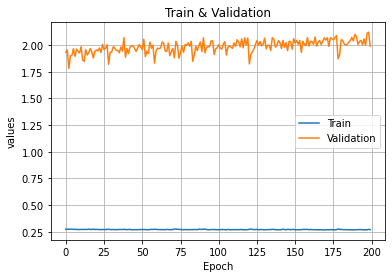

In [ ]:
single_history_plot(hist.history['loss'], hist.history['val_loss'])

In [ ]:
def predict_range_plot(y, pred, x_range):
    plt.plot(x_range, y[x_range], 'r')
    plt.plot(x_range, pred[x_range], 'b')
    plt.legend(['True','Predicted'], loc = 'best')
    plt.grid()
    plt.show()

In [ ]:
predict_range_plot(y_test[:,0],pred[:, 0], range(21))

IndexError: ignored